In [1]:
%matplotlib inline
import scikits.bootstrap as bootstrap
import numpy as np
import pylab
import seaborn

c:\users\terry\py3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Let's start with some data.  This is the example data from (Loftus & Masson, 1994, "Using confidence intervals in within-subject designs")

This is data from 10 subjects, each of which were tested in 3 conditions (conditions 1, 2, and 5).

In [18]:
data = np.array([
    [10,13,13],
    [6,8,8],
    [11,14,14],
    [22,23,25],
    [16,18,20],
    [15,17,17],
    [1,1,4],
    [12,15,17],
    [9,12,12],
    [8,9,12],
])
x = [1,2,5]


Let's compute the confidence intervals for each of the 3 conditions.

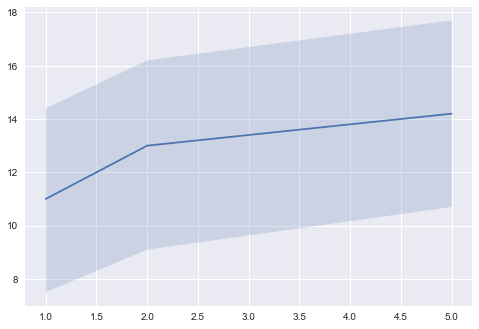

In [20]:
mean = np.array([np.mean(d) for d in data.T])
ci = np.array([bootstrap.ci(d,np.mean) for d in data.T])

pylab.fill_between(x, ci[:,0], ci[:,1], alpha=0.2)
pylab.plot(x,mean)
pylab.show()

Looks like there's no significant difference between the conditions!

But wait a second, maybe the confidence intervals are being swamped by individual differences that have nothing to do with the conditions.  So let's try subtracting those differences out to produce a within-subjects confidence interval, as suggested by Loftus and Masson.

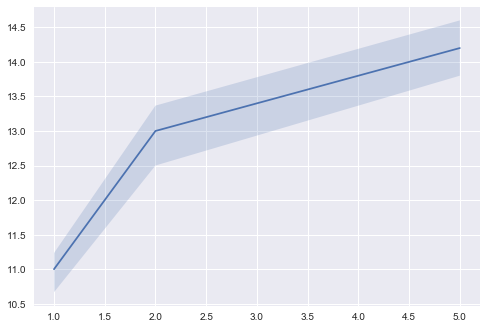

In [26]:
subject_mean = np.mean(data, axis=1)   # mean for each subject, across conditions
overall_mean = np.mean(data)           # overall mean

shifted_data = data - subject_mean[:,None] + overall_mean
shifted_mean = np.array([np.mean(d) for d in shifted_data.T])

assert np.allclose(mean, shifted_mean)   # just to make sure

shifted_ci = np.array([bootstrap.ci(d,np.mean) for d in shifted_data.T])
pylab.fill_between(x, shifted_ci[:,0], shifted_ci[:,1], alpha=0.2)
pylab.plot(x,shifted_mean)
pylab.show()

That looks like an effect to me!  

The other way we could have gotten this same result is to compute the confidence intervals on each individual's *difference in result*

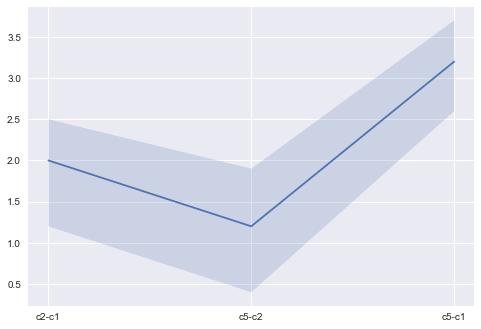

In [35]:
diff_data = np.array([data[:,1]-data[:,0], 
                      data[:,2]-data[:,1], 
                      data[:,2]-data[:,0]])

diff_mean = np.array([np.mean(d) for d in diff_data])
diff_ci = np.array([bootstrap.ci(d,np.mean) for d in diff_data])

pylab.fill_between(range(3), diff_ci[:,0], diff_ci[:,1], alpha=0.2)
pylab.plot(range(3),diff_mean)
pylab.xticks(range(3), ['c2-c1', 'c5-c2', 'c5-c1'])
pylab.show()


This shows that the difference between the various conditions is always positive (since the confidence intervals do not cross zero), so there is a significant difference between conditions.